 # **Segunda entrega do trabalho da disciplina SME0110 - Programação Matemática**
 
 Bruno Baldissera Carlotto 10724351 bruno.baldissera@usp.br<br>
 Bruno Gazoni 7585037 bruno.gazoni@usp.br<br>
 Gabriel Eluan 10734453 gabriel.eluan@usp.br<br>
 Matheus Populim 10734710 matheus.steigenberg@usp.br<br>
 
---
 
 
 
 # **O Problema**:
 
 Para esta variante do problema do caixeiro viajante estamos interessados em encontrar um caminho que passe por todas as galáxias de um dado conjunto minimizando a distância final percorrida neste caminho. Para isso, notemos que as possíveis soluções são caminhos hamiltonianos, se imaginarmos o problema como um de grafos, e estes apresentam características cíclicas (por exemplo, é irrelevante para nós definirmos uma galáxia inicial e final). Além disso não estamos interessados no sentido do trajeto, tornando um caminho $A \rightarrow B \rightarrow C$ equivalente a um $C \rightarrow B \rightarrow A$.



Nesse problema também como restrições de subcircuitos temos as combinações de caminhos inválidos do tipo $A \rightarrow B \rightarrow C \rightarrow A$ e $D \rightarrow D$ separados.
 
---
 
 
Utilizaremos uma abordagem que modela o problema como um de programação linear, e teremos como dados:
 
Galáxias (pontos no espaço bidimensional): Cada $g_i$ é uma galáxia com coordenadas $g_i = (g_{i1}, g_{i2})$.
 
As distâncias entre as galáxias serão dadas por $d(x_{ij})$, que é a distância euclidiana entre as galáxias $g_i$ e $g_j$ dada por $d(x_{ij})={\sqrt {(g_{i1}-g_{j1})^{2}+(g_{i2}-g_{j2})^{2}}}$. 
São usadas duas dimensões pois o problema é planar, visto que as distâncias são na verdade no contexto da visualização do espaço por um telescópio.
 
Um caminho composto por $N$ trechos entre as $N$ galáxias é representado pela matriz $$X = \begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots & \vdots & \vdots & \vdots & \vdots\\
    x_{n1}       & x_{n2} & x_{n3} & \dots & x_{nn}
\end{bmatrix}$$
 
Exemplo: dadas 5 galáxias, um caminho $g_0 \rightarrow g_3 \rightarrow g_1 \rightarrow g_2 \rightarrow g_4 \rightarrow g_0$ seria representado por

$$X = \begin{bmatrix}
    0 & 0 & 0 & 1 & 0\\
    0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1\\
    0 & 1 & 0 & 0 & 0\\
    1 & 0 & 0 & 0 & 0 \\
\end{bmatrix}$$

Que, graças à simetria do problema, pode ser mais facilmente representado e com menos memória na seguinte forma:

$$X = \begin{bmatrix}
     &  &  &  & \\
    0 &  &  &  & \\
    0 & 1 &  &  & \\
    1 & 1 & 0 &  & \\
    1 & 0 & 1 & 0 & \\
\end{bmatrix}$$
 
Repare que essa estrutura reflete uma característica importante do tipo de solução do problema, no sentido de que não aponta o ponto inicial de um caminho.
Temos assim uma complexidade de memória resultante de $\frac {N * (N-1)}{2}$
 
Cada $x_{ij}$ representa a existência ou não do trecho da galáxia $g_i$ para a $g_j$ no caminho. Assim, cada $x_{ij}$ é uma variável binária, valendo $1$ se o trecho existe e $0$ caso contrário.
 
Temos como função objetivo a soma das distâncias de cada trecho do caminho:
 
$$ Min \; \sum_{i \neq j}{d(x_{ij})}$$
 
Sujeita a:
 
$$(1) \;\; \sum_{i}^{N}{x_{ij} = 1} \;\;\;\;\; i = 0, \, \dots \, , N-1$$
$$(2) \;\; \sum_{j}^{N}{x_{ij} = 1} \;\;\;\;\; i = 0, \, \dots \, , N-1$$
$$(3) \;\; X \in \mathbb{M}^{n \times n}$$
$$(4) \;\; x_{ij} \in \{0, 1\} \;\;\forall x_{ij} \in X$$
$$(5) \;\; d(x_{ij}) \in \mathbb{R} \gt 0, \;\;\forall x_{ij} \in X $$
$$(S) \;\; \sum_{i \neq j}{x_{ij} \leq \mathbb\lvert S\rvert - 1} \;\;, \;\;\forall S \subset N : 2 \leq \mathbb\lvert S\rvert \leq \mathbb\lvert V(S)\rvert -1$$
 
A restrição $(1)$ Garante que cada linha da matriz $X$ possui apenas um valor $1$, isto é, para cada galáxia no caminho temos apenas uma outra subsequente no caminho. 
 
$(2)$ Cumpre um papel análogo, mas restringindo as colunas ao invés de linhas.
 
$(3)$ Diz que $X$ é uma matriz $n \times n$.
 
$(4)$ Diz que $x_{ij}$ é uma variável binária.
 
$(5)$ Diz que as distâncias entre galáxias são números reais positivos.
 
$(S)$ Representa o conjunto de restrições que elimina a presença de subcircuitos nas soluções. Para cada subconjunto possível das soluções, não permitimos que sua cardinalidade seja maior ou igual ao número de galáxias que passa o subconjunto em questão ($V(S)$), e assim são eliminados os subcircuitos, já que o subconjunto da solução que contém apenas o subcircuito violaria essa inequação.

In [ ]:
!pip install ortools
!pip install tsp-solver2

In [ ]:
from __future__ import print_function
from ortools.linear_solver import pywraplp
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from tsp_solver.greedy import solve_tsp

In [ ]:
#Aqui importamos os dados das instâncias do problema que resolveremos

url = 'http://www.math.uwaterloo.ca/tsp/world/wi29.tsp' # western sahara
r = requests.get(url, allow_redirects=True)
open('wi29.txt', 'wb').write(r.content)

url = 'http://www.math.uwaterloo.ca/tsp/world/dj38.tsp' # dj
r = requests.get(url, allow_redirects=True)
open('dj38.txt', 'wb').write(r.content)

url = 'http://www.math.uwaterloo.ca/tsp/world/qa194.tsp' # qatar
r = requests.get(url, allow_redirects=True)
open('qa194.txt', 'wb').write(r.content)

url = 'http://www.math.uwaterloo.ca/tsp/world/uy734.tsp' # uruguay
r = requests.get(url, allow_redirects=True)
open('uy734.txt', 'wb').write(r.content)

19906

In [ ]:
# Esta função retorna a distância euclidiana dadas as coordenadas cartesianas de dois pontos.
def dist(a,b):
	return round((np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)))

#essa função le os pontos dos arquivos
def read_from_file(nome):
	pontos = list()
	vertices = list()
	flag = False
	with open(nome,'r') as f:
		for linha in f:
			linha = linha.split()
			if(linha[0] == '1'):
				flag = True
			if(flag == True):
				if(len(linha) > 2):
					vertices.append(int(linha[0])-1)
					pontos.append([float(linha[1]),float(linha[2])])
	return vertices, np.array(pontos)

#Esta função calcula o custo total de um caminho
def cost(path,D):
	soma = 0
	for i in range(len(path)-1):
		soma += D[path[i],path[i+1]]
	soma += D[path[0],path[-1]]
	return soma

  # Solução empregada
  O solver que empregamos (SCIP, importado do OR-Tools) utiliza restrições de minimização de custos de arestas para criar caminhos. Entretanto, esse princípio leva a formação de subcircuitos se restrições apropriadas não forem estabelecidas. Para isso, incluímos uma função que analisa o grafo em termos de componentes conexos, partindo do pressuposto que se todos os nós do nosso grafo possuem grau igual a dois e a função não detectar mais de um componente conexo no caminho hamiltoniano, teremos um mapa correto e sem subcircuitos, visto que os subcircuitos em si caracterizariam componentes conexos distintos. O laço cria então soluções com menores custos de arestas e adiciona restrições conforme subcircuitos são detectados para uma nova iteração.

  Para gerar uma solução viável suficientemente boa, empregamos uma heurística gulosa antes de iniciar o solver nas iterações descritas acima. O valor da heurística é usado através da função setHint() para auxiliar na performance do solver e em uma instância, Uruguay, utilizado como solução final do problema dado que o solver não foi capaz de resolver em tempo hábil. A heurística para o Uruguai, como esperado, nos proporcionou um caminho 7% menos eficiente que o ótimo documentado no site.

# Heurística

Essa heurística é um algoritmo guloso simples.

1. Inicialmente, cada caminho contém apenas um vértice. 
2. Procura 2 fragmentos dos caminhos mais próximos e conecta-os.
3. Repete, enquanto existam 2 fragmentos de caminhos.

In [ ]:
def cria_variaveis(solver,N):
    x = {}
    print(N)
    for i in range(N):
        for j in range(N):
            if(i>j):
                x[i,j] = solver.IntVar(0,1,name='x[{},{}]'.format(i,j))
    print('Number of variables =', solver.NumVariables())
    return x

def solve_problem(nome,heuristica_bool):
    vertices,pontos = read_from_file(nome)
    N = len(vertices)

    #cria o solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    #define as variáveis
    x = cria_variaveis(solver,N)
    
    solver.SetTimeLimit(30*1000)
    #adiciona restrições de grau = 2 (i.e cada vertice deve ter apenas 2 outros adjacentes)
    for i in vertices:
        solver.Add(sum(x[i,j] for j in vertices if j < i) + sum(x[j,i] for j in vertices if j > i) == 2)

    #cria a matriz de adjacencias, tendo a distância entre os vértices como valor de cada entrada
    D = np.zeros((N,N),dtype=int)
    minimo = 1000000 
    for i in range(N):
        for j in range(N):
            D[i,j] = dist(pontos[i],pontos[j])
            #encontra a menor distancia entre vertices 
            if(i!=j):
                if(minimo>D[i,j]):
                    minimo = D[i,j]
                    ponto_minimo = (i,j)

    #Definimos uma heurística para o ponto de partida da solução
    path = solve_tsp( D)
    #path = solve_tsp( D,endpoints = ponto_minimo)
    print(cost(path,D))

    #Geramos uma lista com as arestas do caminho obtido pela heurística.
    edges = list()
    for i in range(len(path)-1):
        edges.append((path[i],path[i+1]))
    edges.append((path[-1],path[0]))

    #caso você queria plotar o gráfico gerado pela heuristica,
    #ative o código a seguir
    if(True):
        aresta = list()
        for i in range(len(path)-1):
            aresta.append((path[i],path[i+1]))
        aresta.append((path[-1],path[0]))
        G = nx.Graph()
        G.add_edges_from(aresta)
        nx.draw(G,pontos,node_size=1,with_labels=True)
        plt.show()

    #gera uma matriz de adjacencias para passar o caminho
    #gerado pela heuristica para o solver
    hint = np.zeros((N,N))
    for i in range(len(path)-1):
        hint[path[i],path[i+1]] = 1
        hint[path[i+1],path[i]] = 1
    hint[path[-1],path[0]] = 1
    hint[path[0],path[-1]] = 1

    #O solver só aceita a hint como uma lista de variáveis e uma lista de valores
    #Cria as duas listas, e passa para o solver
    listahint1 = list()
    listahint2 = list()
    for i in range(N):
        for j in range(N):
            if(i>j):
                listahint1.append(x[i,j])
                listahint2.append(int(hint[i,j]))
    
     

    #Essa função adiciona constraints para eliminar a formação de subtours nas soluções
    # baseando-se na contagem de componentes conexos do grafo (se há mais de um elimina-se essa possibilidade)
    # dadas as arestas passadas por parâmetro.
    def addcut(cut_edges):
        G = nx.Graph()
        G.add_edges_from(cut_edges)
        nx.draw(G,pontos,node_size=1)
        plt.show()
        Components = list(nx.connected_components(G))
        print("Componentes:",len(Components))
        if len(Components) == 1:
            return False
        for S in Components:
            solver.Add(sum(x[j,i] for i in S for j in S if j>i) <= len(S)-1)
        return True
    print('Number of constraints =', solver.NumConstraints())

    if(heuristica_bool == True):
        print("Heuristica ativada!")
        solver.SetHint(listahint1,listahint2) # ponto de partida
    #    addcut(edges)
    else:
        print("Heuristica desativada!")
    

    # Função de minimização
    solver.Minimize(sum(x[i,j]*D[i,j] for i in vertices for j in vertices if j < i))

    #Itera pelo programa
    for itera in range(40):
        tempo = time.time()
        print(itera)

        #solver resolve com as restrições dadas até o momento
        #tempo_local = time.time()
        status = solver.Solve()
        print('Problem solved in %d iterations' % solver.iterations())
        print('Problem solved in %d branch-and-bound nodes' % solver.nodes())
        print('Objective value =', solver.Objective().Value())
        #A partir da solução na forma matricial, gera um grafo
        #no formato de lista de arestas
        edges = []
        for (i,j) in x:
            if (x[i,j].solution_value()) > 0.01:
                edges.append((i,j))

        #verifica se a solução apresenta subtours
        #Se sim, adiciona novas restrições aos subtours dessa solução
        #Se não, interrompe o programa
        if (addcut(edges) == False):
            print("chegou")
            break
        print("Tempo pra rodar uma iteração do loop:",-tempo + time.time())

    print('Solution:')
    print('Objective value =', solver.Objective().Value())

    #Plota a solução final
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G,pontos,node_size=1)
    plt.show()

    #Exibe dados da resolução do problema
    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())


29
Number of variables = 406
35878


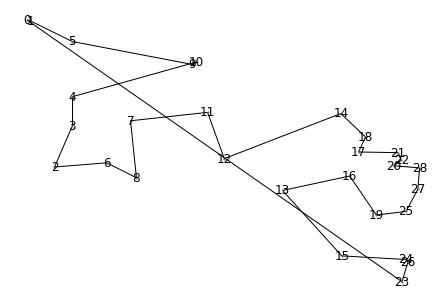

Number of constraints = 29
Heuristica ativada!
0
Problem solved in 54 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 24060.0


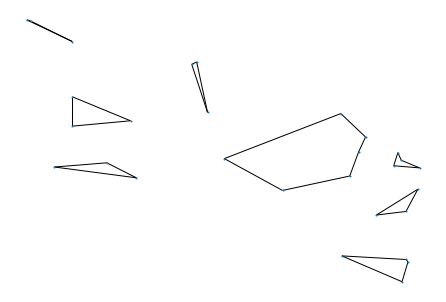

Componentes: 8
Tempo pra rodar uma iteração do loop: 0.20191526412963867
1
Problem solved in 49 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 26293.0


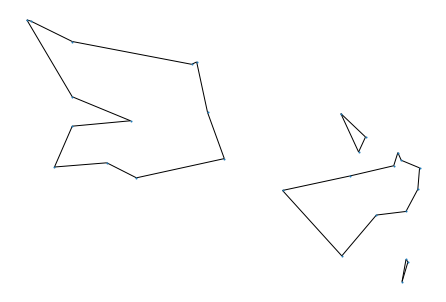

Componentes: 4
Tempo pra rodar uma iteração do loop: 0.19157743453979492
2
Problem solved in 59 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 27334.999999999996


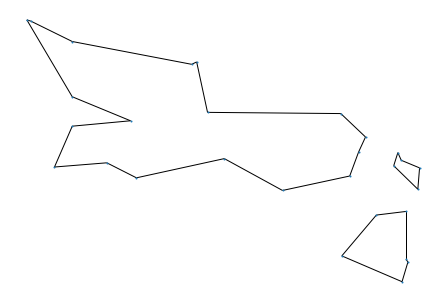

Componentes: 3
Tempo pra rodar uma iteração do loop: 0.19933462142944336
3
Problem solved in 57 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 27603.0


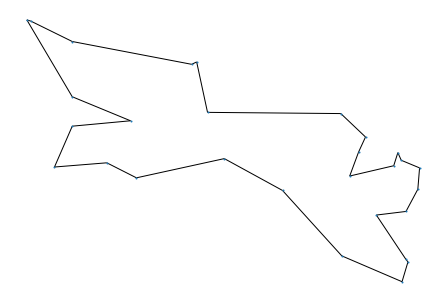

Componentes: 1
chegou
Solution:
Objective value = 27603.0


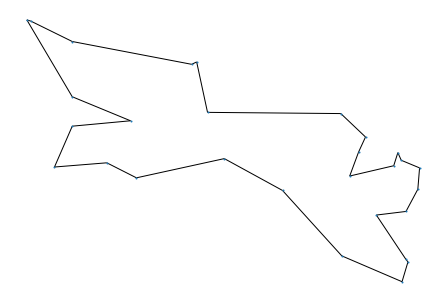


Advanced usage:
Problem solved in 1238.000000 milliseconds
Problem solved in 57 iterations
Problem solved in 1 branch-and-bound nodes


In [ ]:
nome = 'wi29.txt' #western sahara 29 pontos  optimal 27603

solve_problem(nome,True)

38
Number of variables = 703
7019


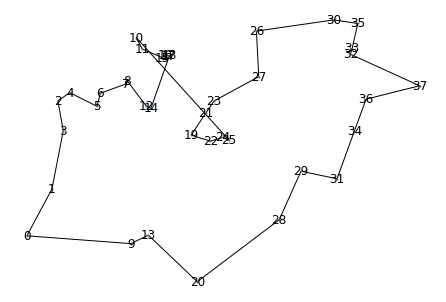

Number of constraints = 38
Heuristica ativada!
0
Problem solved in 53 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 6370.0


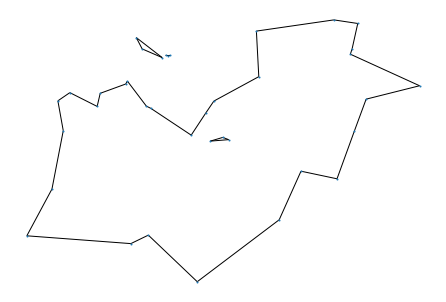

Componentes: 4
Tempo pra rodar uma iteração do loop: 0.30031847953796387
1
Problem solved in 57 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 6410.0


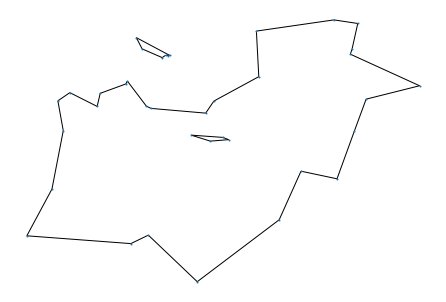

Componentes: 3
Tempo pra rodar uma iteração do loop: 0.22926640510559082
2
Problem solved in 61 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 6575.0


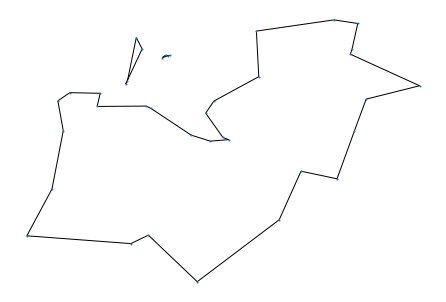

Componentes: 3
Tempo pra rodar uma iteração do loop: 0.20983481407165527
3
Problem solved in 67 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 6656.0


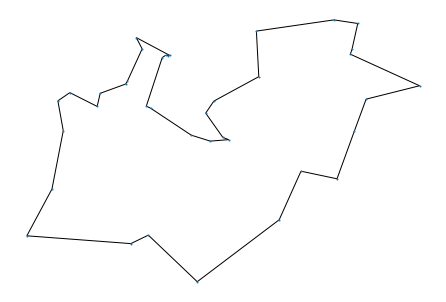

Componentes: 1
chegou
Solution:
Objective value = 6656.0


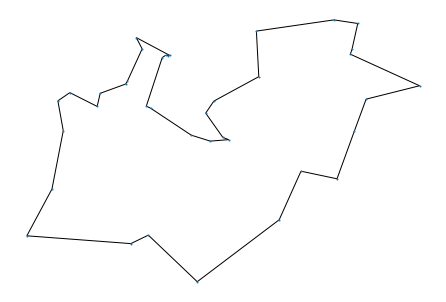


Advanced usage:
Problem solved in 1432.000000 milliseconds
Problem solved in 67 iterations
Problem solved in 1 branch-and-bound nodes


In [ ]:
nome = 'dj38.txt' #djibouti 38 pontos #6656

solve_problem(nome,True)

194
Number of variables = 18721
10428


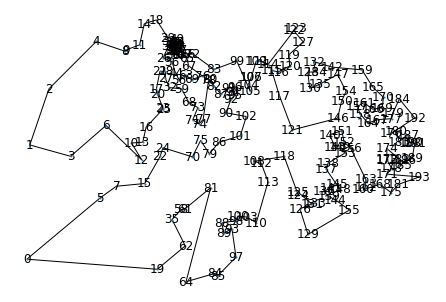

Number of constraints = 194
Heuristica desativada!
0
Problem solved in 936 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9096.0


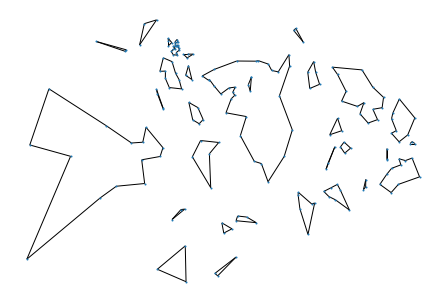

Componentes: 32
Tempo pra rodar uma iteração do loop: 2.2623183727264404
1
Problem solved in 374 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 9286.0


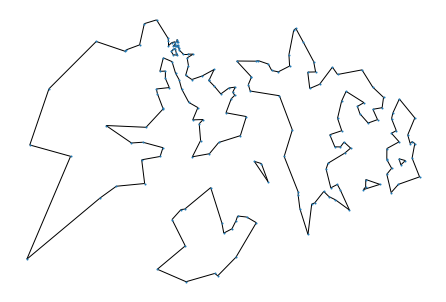

Componentes: 9
Tempo pra rodar uma iteração do loop: 2.215848922729492
2
Problem solved in 1841 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9326.0


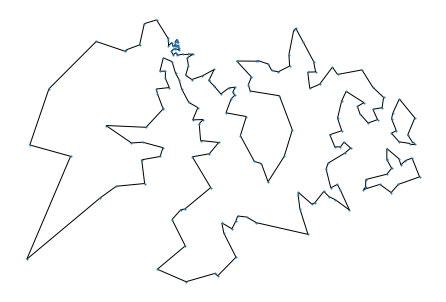

Componentes: 4
Tempo pra rodar uma iteração do loop: 5.5127599239349365
3
Problem solved in 1406 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9330.0


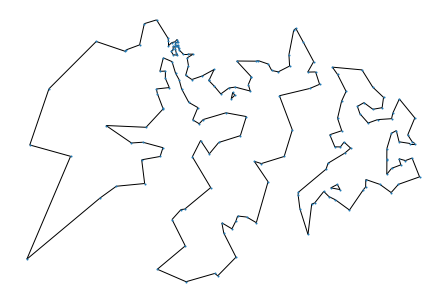

Componentes: 5
Tempo pra rodar uma iteração do loop: 7.5926673412323
4
Problem solved in 1758 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9338.0


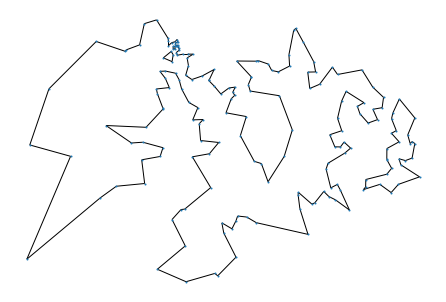

Componentes: 4
Tempo pra rodar uma iteração do loop: 9.192282676696777
5
Problem solved in 2623 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9340.0


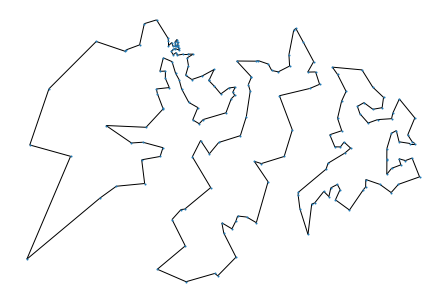

Componentes: 3
Tempo pra rodar uma iteração do loop: 9.479696989059448
6
Problem solved in 1147 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9341.0


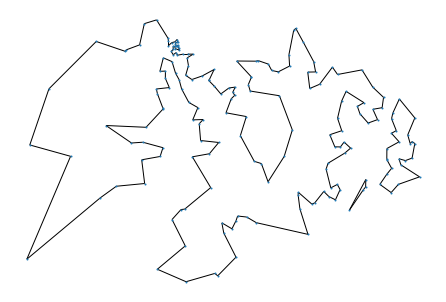

Componentes: 3
Tempo pra rodar uma iteração do loop: 7.596625566482544
7
Problem solved in 998 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9341.0


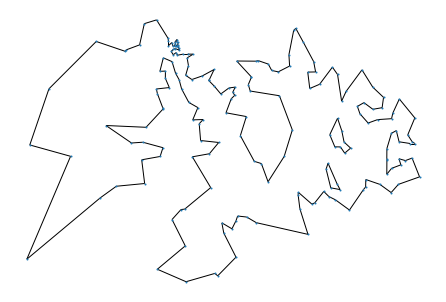

Componentes: 3
Tempo pra rodar uma iteração do loop: 7.840078115463257
8
Problem solved in 1996 iterations
Problem solved in 3 branch-and-bound nodes
Objective value = 9348.0


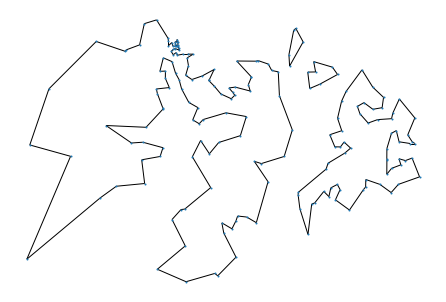

Componentes: 4
Tempo pra rodar uma iteração do loop: 13.742490530014038
9
Problem solved in 1480 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9349.0


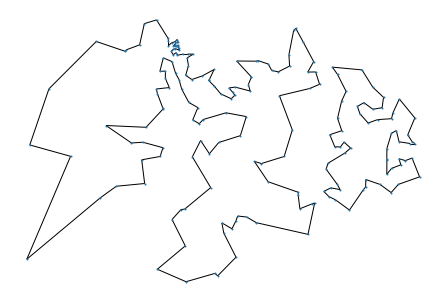

Componentes: 2
Tempo pra rodar uma iteração do loop: 10.035264253616333
10
Problem solved in 2020 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9349.999999999996


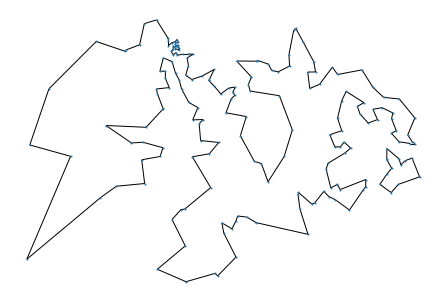

Componentes: 2
Tempo pra rodar uma iteração do loop: 10.64677119255066
11
Problem solved in 2375 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9351.0


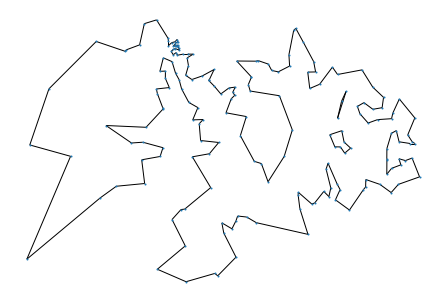

Componentes: 3
Tempo pra rodar uma iteração do loop: 12.156548261642456
12
Problem solved in 2198 iterations
Problem solved in 2 branch-and-bound nodes
Objective value = 9351.999999999989


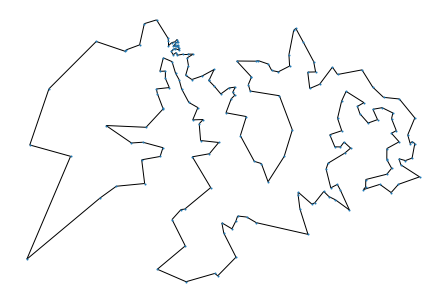

Componentes: 1
chegou
Solution:
Objective value = 9351.999999999989


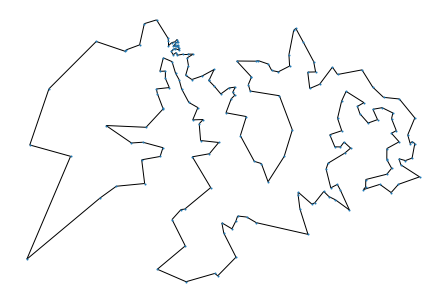


Advanced usage:
Problem solved in 113643.000000 milliseconds
Problem solved in 2198 iterations
Problem solved in 2 branch-and-bound nodes


In [ ]:
nome = 'qa194.txt' # qatar 194 pontos

solve_problem(nome,False)

Sem Heurística:

Problem solved in 107224.000000 milliseconds

Problem solved in 2198 iterations

Problem solved in 2 branch-and-bound nodes

Em todas as instâncias do problema resolvidas até agora foram encontradas as soluções ótimas, comparando a resposta obtida com a literatura. Portanto os gaps foram todos iguais a 0 até então.

734
Number of variables = 269011
87003


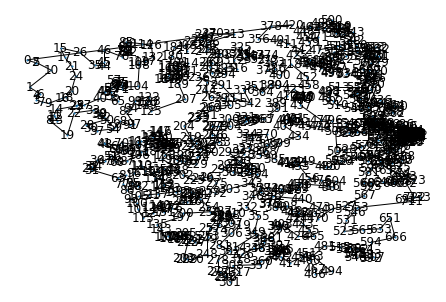

Number of constraints = 734
Heuristica ativada!
0
Problem solved in 1211 iterations
Problem solved in 1 branch-and-bound nodes
Objective value = 87003.0


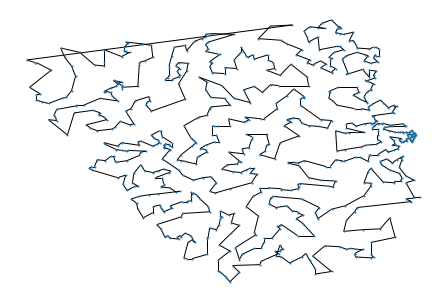

Componentes: 1
chegou
Solution:
Objective value = 87003.0


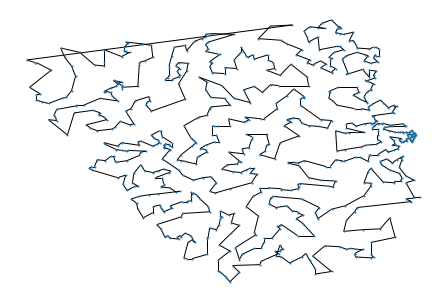


Advanced usage:
Problem solved in 49514.000000 milliseconds
Problem solved in 1211 iterations
Problem solved in 1 branch-and-bound nodes


In [ ]:
nome = 'uy734.txt' #uruguay 734 pontos

solve_problem(nome,True)

   Ao executarmos a instância do Uruguai com as mesmas condições das anteriores, o solver não foi capaz de resolver o problema em tempo hábil, e ainda  quando finalizou sua execução exibiu uma resposta 'parcial' inválida, contendo alguns subcircuitos. Dado que nosso algoritmo adereça esse problema adicionando constraints novas a cada iteração supomos que houve algum problema que causou uma interrupção precoce do solver. Infelizmente investigar esse tipo de problema se tornou um trabalho difícil usando este solver pois muito do que acontece durante sua execução funciona como uma caixa preta para nós, e inclusive a própria documentação não é totalmente transparente quanto a alguns aspectos funcionais da ferramenta. Por exemplo, até mesmo ao imbuírmos com heurísticas usando a função SetHint(), a documentação da ferramenta não garante quando e se a heurística será usada.

  Frente a isso optamos por abordar este último problema apenas com a heurística que definimos e obtemos uma solução compreensivelmente não ótima mas satisfatória, dadas as circunstâncias (GAP de 7%).

  Testamos outras abordagens, dentre elas tentamos usar a ideia do algoritmo 2-opt em trechos particulares do algoritmo visando uma meljhoria mais rápida em algumas iterações mas não tivemos bons resultados.

In [ ]:
LP_vcs = 85249
LP_site = 79114
uyGAP = (LP_vcs - LP_site) / LP_site * 100
print(uyGAP)

7.754632555552747


# Referências



1. The Approximation Ratio of the 2-Opt Heuristic for the Metric Traveling 
Salesman Problem. Stefan Hougardy, Fabian Zaiser, Xianghui Zhong (2019). Disponível em:
https://arxiv.org/abs/1909.12025


2. Implementation of Greedy Algorithm in Travel Salesman Problem. Samson Ejim (2016). Disponível em:
https://www.researchgate.net/deref/http%3A%2F%2Fdx.doi.org%2F10.13140%2FRG.2.2.23921.48485

3. Generating subtour elimination constraints for the TSPfrom pure integer solutions.
  Ulrich Pferschy e Rostislav Stanek (2016). Disponível em:
  https://core.ac.uk/download/pdf/81778676.pdf

4. Implementing the Dantzig-Fulkerson-Johnson algorithm for large traveling salesman problems. David Applegate, Robert Bixby, Vasek Chvátal e William Cook (2003). Disponível em: https://www.researchgate.net/publication/225493761_Implementing_the_Dantzig-Fulkerson-Johnson_algorithm_for_large_traveling_salesman_problems

5. Heuristics for the Traveling Salesman Problem. Christian Nilsson. Disponível em: http://160592857366.free.fr/joe/ebooks/ShareData/Heuristics%20for%20the%20Traveling%20Salesman%20Problem%20By%20Christian%20Nillson.pdf

6. A comparative analysis of several asymmetric traveling salesmanproblem formulations
  Temel Öncan, I. Kuban Altınel e Gilbert Laporte (2007)
  https://edisciplinas.usp.br/pluginfile.php/5703305/mod_resource/content/1/Oncan_2009.pdf


# Perguntas?